In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y matriz de confusión
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score



#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
df =  pd.read_pickle("../datos/setas/setas_balance.pkl")

In [3]:
# separamos los datos en X e y

X1 = df.drop("class", axis = 1)
y1 = df["class"] 

In [4]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42) 

In [5]:
# definimos la regresión logistica

log_reg = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg.fit(x_train1,y_train1)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train = log_reg.predict(x_train1)

# obtenemos las predicciones para el conjunto de test
y_pred_test = log_reg.predict(x_test1) 

In [6]:
train_df= pd.DataFrame({'Real': y_train1, 'Predicted': y_pred_train, 'Set': ['Train']*len(y_train1)})
test_df= pd.DataFrame({'Real': y_test1, 'Predicted': y_pred_test, 'Set': ['Test']*len(y_test1)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.head() 

,Real,Predicted,Set
17355,0,0,Train
38215,1,1,Train
23317,1,1,Train
21525,1,1,Train
18924,0,0,Train


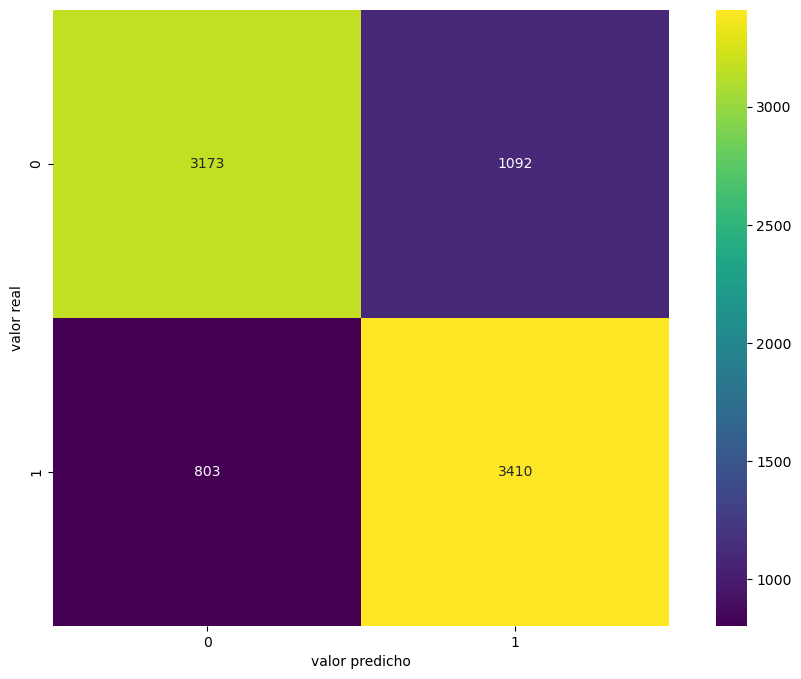

In [7]:
# MATRIZ DE CORRELACIÓN PARA DATOS CODIFICADOS Y ESTANDARIZADOS

mat_lr1 = confusion_matrix(y_test1, y_pred_test)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr1, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show() 

Expliquemos los resultados que vemos en esta matriz de confusión: 

Antes de nada recordemos que en nuestro *dataframe* la variable respuesta se dividía de la siguiente forma: 

- 0: Es venenosa 

- 1: No es venenosa, es comestible


En este contexto: 

- El número 3173 (valor real 0 (venenosa), valor predicho 0 (venenosa)), indica que nuestro modelo ha predicho 3173 setas venenosas que son venenosas. 

- El número 3410 (valor real 1 (comestible), valor predicho 1 (comestible)), indica que nuestro modelo a predicho 3410 setas venenosas que son venenosas. 

- El número 803 (abajo a la izquierda) (valor real 1 (comestible), valor predicho 0 (venenosa)), indica que nuestro modelo esta prediciendo 803 setas venenosas que en realidad son comestibles. 

- El número 1092 (valor real 0 (venenosa), valor predicho 1 (comestible)) indica que nuestro modelo esta prediciendo 1092 setas comestibles que en realidad son venenosas.  

# MÉTRICAS

In [8]:
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):

    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)

    # definimos el datafram de return
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
    "precision": [precision_test, precision_train],
    "recall": [recall_test, recall_train], 
    "f1": [f1_test, f1_train],
    "kappa": [kappa_test, kappa_train],
    "set": ["test", "train"]})

    df["modelo"] = modelo
    
    return df 

In [9]:
results_logistic_esta = metricas(y_test1, y_pred_test, y_train1, y_pred_train, "Regresión logistica")
results_logistic_esta 

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.776480,0.757441,0.809399,0.782559,0.553131,test,Regresión logistica
1,0.780153,0.766895,0.805960,0.785942,0.560271,train,Regresión logistica


### Interpretando métricas

- Accuracy: nuestro modelo acierta el 78% de las veces

- Precision: nuestro modelo se equivocará un 24% de las veces, prediciendo que una seta es venenosa cuando en realidad no lo es. 

- Recall: nuestro modelo es capaz de identificar un 81% de las setas que son venenosas. 

- Kappa: tenemos un valor de 0.5. Esto nos indica que la concordancia de nuestros datos es moderada. El 55% de nuestros resultados son predichos solo por azar. Por lo tanto nuestro modelo no es muy bueno. 

### Conclusiones

Pareciera que nuestras métricas no son malas, pero con un valor tan alto de kappa gran parte de nuestros datos son predichos por azar, por lo tanto no es un buen modelo. Nuestros próximos pasos serán probar otro tipo de modelos y evaluar si conseguimos uno mejor. Nos interesaría bajar la cantidad de Falsos Negativos, ya que estamos diciendo que una seta es comestible cuando en realidad es venenosa. 